PROBLEM STATEMENT:
Build CNN Model for Classification Of Flowers


Mounting drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DATA AUGMENTATION

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False,validation_split=0.2)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [5]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM assignment 3/flowers",target_size=(64,64),class_mode='categorical',batch_size=100,subset = 'training')

Found 3503 images belonging to 5 classes.


In [6]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM assignment 3/flowers",target_size=(64,64),class_mode='categorical',batch_size=100,subset = 'validation')

Found 872 images belonging to 5 classes.


In [9]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

CNN MODEL( Adding  Layers :Convolution,MaxPooling,Flatten,Dense-(Hidden
Layers),Output)


In [7]:
from tensorflow.keras.models import Sequential

In [8]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [10]:
model=Sequential()

In [11]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Flatten())

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [15]:
#hidden layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(5,activation='softmax'))#op layer

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

FIT THE MODEL

In [17]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
36/36 [==============================] - 470s 13s/step - loss: 1.4513 - accuracy: 0.3908 - val_loss: 1.2657 - val_accuracy: 0.4782
Epoch 2/10
36/36 [==============================] - 17s 477ms/step - loss: 1.1574 - accuracy: 0.5344 - val_loss: 1.1854 - val_accuracy: 0.5482
Epoch 3/10
36/36 [==============================] - 21s 574ms/step - loss: 1.0840 - accuracy: 0.5712 - val_loss: 1.2353 - val_accuracy: 0.5126
Epoch 4/10
36/36 [==============================] - 18s 482ms/step - loss: 1.0093 - accuracy: 0.5958 - val_loss: 1.0953 - val_accuracy: 0.5654
Epoch 5/10
36/36 [==============================] - 17s 486ms/step - loss: 0.9547 - accuracy: 0.6280 - val_loss: 1.1978 - val_accuracy: 0.5585
Epoch 6/10
36/36 [==============================] - 18s 492ms/step - loss: 0.9132 - accuracy: 0.6474 - val_loss: 1.0435 - val_accuracy: 0.6009
Epoch 7/10
36/36 [==============================] - 19s 525ms/step - loss: 0.8841 - accuracy: 0.6566 - val_loss: 1.1237 - val_accuracy: 0.5573


SAVING THE MODEL

In [18]:
model.save('flowers.h5')


TESTING THE MODEL

In [19]:

import numpy as np
from tensorflow.keras.preprocessing import image

In [20]:
img = image.load_img('/content/drive/MyDrive/IBM assignment 3/flowers/daisy/10140303196_b88d3d6cec.jpg' ,target_size=(64,64)) 

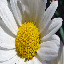

In [21]:
img

In [22]:
x=image.img_to_array(img)

In [23]:
x

array([[[221., 224., 231.],
        [208., 211., 218.],
        [214., 219., 225.],
        ...,
        [ 15.,  24.,  19.],
        [ 12.,  16.,  17.],
        [ 14.,  13.,  18.]],

       [[228., 231., 240.],
        [220., 221., 226.],
        [222., 216., 226.],
        ...,
        [ 27.,  36.,  33.],
        [ 19.,  17.,  20.],
        [  4.,   2.,   7.]],

       [[223., 224., 229.],
        [234., 239., 245.],
        [228., 233., 239.],
        ...,
        [ 34.,  32.,  37.],
        [ 10.,  18.,  20.],
        [ 11.,  10.,  16.]],

       ...,

       [[182., 177., 183.],
        [179., 178., 184.],
        [185., 186., 190.],
        ...,
        [152., 143., 136.],
        [143., 131., 119.],
        [176., 167., 158.]],

       [[174., 178., 181.],
        [169., 168., 173.],
        [199., 196., 203.],
        ...,
        [149., 140., 131.],
        [136., 131., 109.],
        [182., 171., 165.]],

       [[225., 230., 236.],
        [229., 232., 239.],
        [229., 2

In [24]:
x=np.expand_dims(x,axis=0)
x

array([[[[221., 224., 231.],
         [208., 211., 218.],
         [214., 219., 225.],
         ...,
         [ 15.,  24.,  19.],
         [ 12.,  16.,  17.],
         [ 14.,  13.,  18.]],

        [[228., 231., 240.],
         [220., 221., 226.],
         [222., 216., 226.],
         ...,
         [ 27.,  36.,  33.],
         [ 19.,  17.,  20.],
         [  4.,   2.,   7.]],

        [[223., 224., 229.],
         [234., 239., 245.],
         [228., 233., 239.],
         ...,
         [ 34.,  32.,  37.],
         [ 10.,  18.,  20.],
         [ 11.,  10.,  16.]],

        ...,

        [[182., 177., 183.],
         [179., 178., 184.],
         [185., 186., 190.],
         ...,
         [152., 143., 136.],
         [143., 131., 119.],
         [176., 167., 158.]],

        [[174., 178., 181.],
         [169., 168., 173.],
         [199., 196., 203.],
         ...,
         [149., 140., 131.],
         [136., 131., 109.],
         [182., 171., 165.]],

        [[225., 230., 236.],
       

In [25]:
model.predict(x)

array([[7.816458e-17, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00]], dtype=float32)

In [26]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [27]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

'sunflower'

In [28]:
img = image.load_img('/content/drive/MyDrive/IBM assignment 3/flowers/dandelion/10294487385_92a0676c7d_m.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'sunflower'